"Travel Suggest" - это проект для туристического бизнеса, целью которого является рекомендация новому туристу города для посещения в зависимости от его данных. На основе данных о существующих клиентах туристического агентства я построю модель машинного обучения, которая будет предсказывать город назначения новому клиенту. 

1. Анализ данных. 
Для начала проанализирую данные. Создам переменную, которая будет содержать данные клиентов туристического агентства:

In [1]:
import pandas

# Читаем файл в формате Эксель и кладем результат в переменную travelBD

travelBD = pandas.read_excel("/Travel_Suggest/travelBD.xlsx")

Рассмотрим данные, которые находятся в файле. Для этого применим функцию head(). На экране выведутся первые пять строчек таблицы. 
Здесь мы можем увидеть названия колонок таблицы, первые пять значений и порядковые номера строк от 0 до 4. 

In [2]:
travelBD.head() # Выводит первые несколько строк

,zarabotnaya_plata,gorod,vozrast,tip_tura,vid_transporta,chleni_semyi,kurort
0,191000,Апатиты,63,Экскурсионный тур,Морской транспорт,2,Rimini
1,130000,Апатиты,55,Экскурсионный тур,Самолет,1,Rimini
2,158000,Апатиты,58,Пляжный тур,Самолет,1,Rimini
3,236000,Апатиты,69,Круизный отдых,Морской транспорт,2,Rimini
4,196000,Апатиты,64,Пляжный тур,Самолет,2,Rimini


Приступим к анализу данных таблицы. У нас в распоряжении ряд столбцов для анализа, таких как заработная плата, город, возраст и т.д. Для аналитика данных важно детально изучить эту информацию, чтобы узнать базовые характеристики. Каждый столбец имеет свое название переменной, которое можно использовать для получения информации из соответствующей ячейки. Например, чтобы получить данные только по заработной плате, нужно указать название переменной «travelBD» и после точки указать название столбца «zarabotnaya_plata»:

In [3]:
travelBD.zarabotnaya_plata

0      191000
1      130000
2      158000
3      236000
4      196000
        ...  
995    158000
996     45000
997    108000
998     32000
999    130000
Name: zarabotnaya_plata, Length: 1000, dtype: int64

Нам доступна функция discribe(). Это метод, который используется в Pandas библиотеке для создания сводной статистики числовых данных в DataFrame. Он генерирует описательные статистические данные, которые предоставляют информацию, такую как количество, среднее значение, стандартное отклонение и различные процентили данных.

In [4]:
travelBD.zarabotnaya_plata.describe()

count      1000.000000
mean     114935.000000
std       54580.049073
min        3000.000000
25%       71000.000000
50%      102000.000000
75%      164000.000000
max      253000.000000
Name: zarabotnaya_plata, dtype: float64

Для анализа заработной платы туристов можно построить по заработной плате гистограмму.

<Axes: >

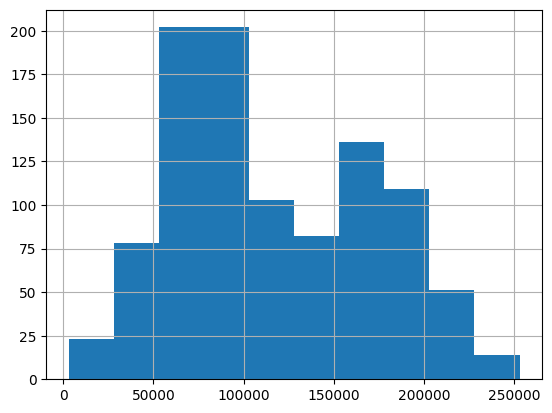

In [5]:
travelBD.zarabotnaya_plata.hist()

Постоим гистограмму по возрасту туристов:

<Axes: >

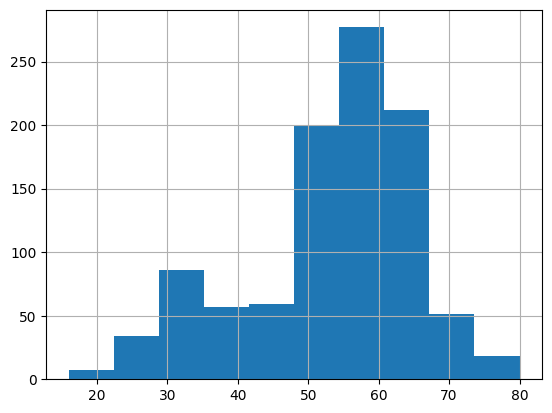

In [6]:
travelBD.vozrast.hist()

Получим информацию по городам, в которых находятся наши туристы. Гистограмму по городам невозможно построить, так как названия городов не являются числами. Но мы можем получить информацию, сколько людей из разных городов:

In [7]:
travelBD.gorod.value_counts()

Санкт-Петербург     307
Москва              267
Сочи                107
Мурманск            106
Самара               84
Воронеж              67
Апатиты              33
Сегежа               14
Петрозаводск         13
Великий-Новгород      1
Минеральные Воды      1
Name: gorod, dtype: int64

Также есть другая похожая другая похожая функция. Она называется unique() - уникальные значения, которые встречаются в этой колонке городов:

In [8]:
travelBD.gorod.unique()

array(['Апатиты', 'Великий-Новгород', 'Воронеж', 'Минеральные Воды',
       'Москва', 'Мурманск', 'Санкт-Петербург', 'Самара', 'Петрозаводск',
       'Сегежа', 'Сочи'], dtype=object)

Воспользуемся этой функцией groupby(), чтобы сгруппировать данные в колонке "gorod":

In [9]:
travelBD.groupby("gorod")

Теперь можно определить максимальный возраст туристов в кажом городе. Мы группируем данные по городу (колонка "gorod") и применяем функцию max() к колонке "vozrast":

In [10]:
travelBD.groupby("gorod")["vozrast"].max()

gorod
Апатиты             74
Великий-Новгород    33
Воронеж             72
Минеральные Воды    65
Москва              80
Мурманск            79
Петрозаводск        74
Самара              78
Санкт-Петербург     76
Сегежа              76
Сочи                80
Name: vozrast, dtype: int64

Помимо собственно функции max(), можно использовать функцию mean() и вывести средний возраст туристов в каждом городе

In [11]:
travelBD.groupby("gorod")["vozrast"].mean()

gorod
Апатиты             60.272727
Великий-Новгород    33.000000
Воронеж             58.343284
Минеральные Воды    65.000000
Москва              52.239700
Мурманск            52.518868
Петрозаводск        63.000000
Самара              56.202381
Санкт-Петербург     50.583062
Сегежа              55.642857
Сочи                54.672897
Name: vozrast, dtype: float64

И соответственно минимальный возраст min(): 

In [12]:
travelBD.groupby("gorod")["vozrast"].min()

gorod
Апатиты             40
Великий-Новгород    33
Воронеж             27
Минеральные Воды    65
Москва              18
Мурманск            19
Петрозаводск        53
Самара              32
Санкт-Петербург     16
Сегежа              34
Сочи                26
Name: vozrast, dtype: int64

Также можно посчитать и другие показатели для этой колонки, например квантиль. Можно выбрать любые квантили, которые интересуют 0.25, 0.75 и так далее.

In [13]:
travelBD.groupby("gorod")["vozrast"].quantile()

gorod
Апатиты             60.0
Великий-Новгород    33.0
Воронеж             59.0
Минеральные Воды    65.0
Москва              55.0
Мурманск            54.0
Петрозаводск        63.0
Самара              55.0
Санкт-Петербург     55.0
Сегежа              57.5
Сочи                56.0
Name: vozrast, dtype: float64

Рассмотрим предпочтения клиентов в том, как они путешествуют:

In [14]:
travelBD.vid_transporta.value_counts()

Самолет              390
Автомобиль           379
Поезд                148
Морской транспорт     83
Name: vid_transporta, dtype: int64

In [15]:
travelBD[travelBD.vid_transporta == 'Самолет']

,zarabotnaya_plata,gorod,vozrast,tip_tura,vid_transporta,chleni_semyi,kurort
1,130000,Апатиты,55,Экскурсионный тур,Самолет,1,Rimini
2,158000,Апатиты,58,Пляжный тур,Самолет,1,Rimini
4,196000,Апатиты,64,Пляжный тур,Самолет,2,Rimini
5,179000,Апатиты,62,Пляжный тур,Самолет,3,Rimini
6,151000,Апатиты,58,Пляжный тур,Самолет,3,Rimini
...,...,...,...,...,...,...,...
993,67000,Сочи,65,Экскурсионный тур,Самолет,1,Singapore
995,158000,Сочи,65,Экскурсионный тур,Самолет,1,Singapore
996,45000,Сочи,64,Экскурсионный тур,Самолет,2,Singapore
998,32000,Сочи,65,Экскурсионный тур,Самолет,1,Singapore


In [16]:
plane_priority = travelBD[travelBD.vid_transporta == 'Самолет']
plane_priority.chleni_semyi.max()

3

2. Создание модели машинного обучения.
Задача модели машинного обучения заключается в том, чтобы спрогнозировать рекомендации для новых клиентов, основываясь на их личных данных. Я хочу научить модель машинного обучения рекомендовать курорт новому клиенту. Например, если клиент сообщает свой доход, возраст и все остальные показатели, модель может рекомендовать ему подходящие города, такие как Сингапур, Лос-Анжелес, Римини и т.д. Для этого модель использует информацию о том, куда ранее ездили другие туристы с теми же показателями. Какие города будут предлагаться в качестве рекомендации? Посмотрим на колонку, которая называется «kurort». Это те города, куда ездили туристы. Применим функцию value_counts(): 

In [17]:
travelBD.kurort.value_counts()

Barcelona      203
Los Angeles    201
Rimini         199
Singapore      199
Dubai          198
Name: kurort, dtype: int64

Мы получили список возможных городов назначения. Задача выбора наиболее вероятного ответа из заранее заданных возможностей называется задачей классификации. Для решения этой задачи используется модель машинного обучения, называемая классификатором.

На вход модели мы будем подавать информацию о нашем клиенте (Х) – это зарплата, город, возраст и так далее (там несколько колонок), а на выходе мы ожидаем получить (Y) - города назначения. 

In [18]:
# Задача "Классификации" - модель МО выбирает наиболее вероятный из заранее известных ответов
# Модель - "Классификатор"
# На вход модели (Х): данные о туристе (ЗП. город, возраст и т.д)
# На выходе модели (y): город назначения (kurort)
# Задача модели найти закономерности между Х и у
# Х => model => y

X = travelBD.drop("kurort", axis=1)
y = travelBD.kurort



С помощью функции pandas.get_dummies() уберем буквенные значения в таблице. X_dummies – это развернутая таблица с нулями и единицами, которую мы получили в результате применения функции get_dummies():

In [19]:
X_dummies = pandas.get_dummies(X, columns=["gorod", "tip_tura", "vid_transporta"])

print (X_dummies)


     zarabotnaya_plata  vozrast  chleni_semyi  gorod_Апатиты  \
0               191000       63             2              1   
1               130000       55             1              1   
2               158000       58             1              1   
3               236000       69             2              1   
4               196000       64             2              1   
..                 ...      ...           ...            ...   
995             158000       65             1              0   
996              45000       64             2              0   
997             108000       63             0              0   
998              32000       65             1              0   
999             130000       55             2              0   

     gorod_Великий-Новгород  gorod_Воронеж  gorod_Минеральные Воды  \
0                         0              0                       0   
1                         0              0                       0   
2                    

Я выберу алгоритм машинного обучения "случайные леса" так как они подходят для решения задачи классификации.
Библиотека scikit-learn предоставляет реализации многих алгоритмов машинного обучения, включая Random Forest Classifier.
Мы приступаем к обучению модели, для этого используем функцию model.fit(). Ключевым моментом в этом процессе является то, что мы просим модель подстроиться под данные x и y, а не просто обучиться на них напрямую. Именно поэтому метод обучения называется fit, что на английском языке означает "подстроиться". Таким образом, модель будет аккуратно и плавно подстраиваться к этим конкретным данным x и y.
В конечном итоге, качество модели будет зависеть от того, насколько точный и качественный пример и качество данных:


In [20]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier ()

model.fit (X_dummies, y)


RandomForestClassifier()

Модель готова к использованию, но прежде чем начать ее применять, необходимо оценить ее качество. Это позволит узнать, насколько точно модель обучилась и способна ли она распознавать закономерности. Одна из первых метрик, которую я использую, - это точность на тренировочной выборке accuracy / train dataset. Это число, которое показывает, насколько хорошо модель усвоила данные. Таким образом, перед использованием модели необходимо провести оценку ее качества с помощью различных метрик, начиная с точности на тренировочной выборке:
model.score (X_dummies, y)

Score () - это функция, которая оценивает эффективность. В машинном обучении она используется для оценки эффективности модели на тестовых данных. Он представляет собой числовую метрику, которая выражает, насколько точно модель способна предсказывать целевую переменную на новых данных. Если значение score() близко к 1, то это означает, что модель предсказывает целевые значения точно, а если score() близко к 0, то модель плохо справляется с предсказанием.


In [21]:
model.score (X_dummies, y)

1.0

Значение score() равно 1, значит модель была обучена хорошо. Для проверки работы модели мы можем ввести данные нового клиента и использовать модель для прогнозирования результатов. Для этого использую команду:
 X_dummies.columns.


In [22]:
X_dummies.columns

Index(['zarabotnaya_plata', 'vozrast', 'chleni_semyi', 'gorod_Апатиты',
       'gorod_Великий-Новгород', 'gorod_Воронеж', 'gorod_Минеральные Воды',
       'gorod_Москва', 'gorod_Мурманск', 'gorod_Петрозаводск', 'gorod_Самара',
       'gorod_Санкт-Петербург', 'gorod_Сегежа', 'gorod_Сочи',
       'tip_tura_Круизный отдых', 'tip_tura_Лечебно-оздоровительный',
       'tip_tura_Лечебно-профилактический', 'tip_tura_Пляжный тур',
       'tip_tura_Шоп-тур', 'tip_tura_Экскурсионный тур',
       'vid_transporta_Автомобиль', 'vid_transporta_Морской транспорт',
       'vid_transporta_Поезд', 'vid_transporta_Самолет'],
      dtype='object')

Для удобства ввода расположим данные в столбик:

In [23]:
{col: [0] for col in X_dummies.columns} 

{'zarabotnaya_plata': [0],
 'vozrast': [0],
 'chleni_semyi': [0],
 'gorod_Апатиты': [0],
 'gorod_Великий-Новгород': [0],
 'gorod_Воронеж': [0],
 'gorod_Минеральные Воды': [0],
 'gorod_Москва': [0],
 'gorod_Мурманск': [0],
 'gorod_Петрозаводск': [0],
 'gorod_Самара': [0],
 'gorod_Санкт-Петербург': [0],
 'gorod_Сегежа': [0],
 'gorod_Сочи': [0],
 'tip_tura_Круизный отдых': [0],
 'tip_tura_Лечебно-оздоровительный': [0],
 'tip_tura_Лечебно-профилактический': [0],
 'tip_tura_Пляжный тур': [0],
 'tip_tura_Шоп-тур': [0],
 'tip_tura_Экскурсионный тур': [0],
 'vid_transporta_Автомобиль': [0],
 'vid_transporta_Морской транспорт': [0],
 'vid_transporta_Поезд': [0],
 'vid_transporta_Самолет': [0]}

Шаблон готов. Теперь скопирую и вставлю в свой код и заполню данные нового клиента. Допустим, это будет житель города Москва, с заработной платой 120 000 рублей, возраст 63 года, у которого 1 член семьи. Он едет в лечебно-оздоровит тур на самолете.

In [24]:
example = {'zarabotnaya_plata': [120000],
 'vozrast': [63],
 'chleni_semyi': [1],
 'gorod_Апатиты': [0],
 'gorod_Великий-Новгород': [0],
 'gorod_Воронеж': [0],
 'gorod_Минеральные Воды': [0],
 'gorod_Москва': [1],
 'gorod_Мурманск': [0],
 'gorod_Петрозаводск': [0],
 'gorod_Самара': [0],
 'gorod_Санкт-Петербург': [0],
 'gorod_Сегежа': [0],
 'gorod_Сочи': [0],
 'tip_tura_Круизный отдых': [0],
 'tip_tura_Лечебно-оздоровительный': [1],
 'tip_tura_Лечебно-профилактический': [0],
 'tip_tura_Пляжный тур': [0],
 'tip_tura_Шоп-тур': [0],
 'tip_tura_Экскурсионный тур': [0],
 'vid_transporta_Автомобиль': [0],
 'vid_transporta_Морской транспорт': [0],
 'vid_transporta_Поезд': [0],
 'vid_transporta_Самолет': [1]}

example_df = pandas.DataFrame(data=example, columns=X_dummies.columns)


Теперь преобразуем данные в формат pandas –таблицы::

In [25]:
example_df

,zarabotnaya_plata,vozrast,chleni_semyi,gorod_Апатиты,gorod_Великий-Новгород,gorod_Воронеж,gorod_Минеральные Воды,gorod_Москва,gorod_Мурманск,gorod_Петрозаводск,...,tip_tura_Круизный отдых,tip_tura_Лечебно-оздоровительный,tip_tura_Лечебно-профилактический,tip_tura_Пляжный тур,tip_tura_Шоп-тур,tip_tura_Экскурсионный тур,vid_transporta_Автомобиль,vid_transporta_Морской транспорт,vid_transporta_Поезд,vid_transporta_Самолет
0,120000,63,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


Введу функцию для предсказания города, в который можно отправить нового туриста:
model.predict(example_df)
Функция predict() используется в машинном обучении для прогнозирования выходных значений, основанных на входных множествах данных. 


In [26]:
model.predict(example_df)

array(['Barcelona'], dtype=object)

Модель предсказала, что клиенту следует отправиться в город Барселона. Однако, поскольку модель имеет в своем названии слово "Random" не случайно, она может предложить и другие варианты мест для посещения. Чтобы узнать, какие другие города могут быть хорошими вариантами, нужно анализировать вероятности, которые выдаст модель. Среди возможных вариантов можно искать те, которые также имеют высокую вероятность и рекомендовать их клиенту:

In [27]:
model.predict_proba(example_df)

array([[0.57, 0.2 , 0.01, 0.06, 0.16]])

Использование predict_proba в моделях классификации может помочь в принятии решения на основе вероятностной информации, а также в выявлении объектов, для которых модель не уверена в правильной классификации. Порядок этих вариантов – это порядок следования городов.

In [28]:
model.classes_

array(['Barcelona', 'Dubai', 'Los Angeles', 'Rimini', 'Singapore'],
      dtype=object)

Вероятность 1 варианта – Барселона - 41 %
Вероятность 2 варианта – Дубай - 28 %
Вероятность 3 варианта – Лос-Анжелес - 0 %
Вероятность 4 варианта – Римини - 9 %
Вероятность 5 варианта – Сингапур - 22 %
Задача модели – выбрать заранее один из заранее известных вариантов.
В реальности она не просто выбирает - она распределяет вероятности между всеми существующими классами – ответами. Сумма процентов даст единицу - 100%.
В итоге я проанализировала данные, построила первую простую модель и научилась её использовать для предсказания. Также изучила распределение вероятностей и определила оптимальное направление для отправки нового туриста
